# Lecture 29: Hill Climb

---

## Overview

The Hill Climb algorithm is one of the most rudimentary local search heuristics. It begins with the current solution – $s$, and the best solution – $s^*$, both, set to the initial solution – $s_o$. Hereafter, in each iteration, the algorithm generates a set of k random candidate solutions – $s'$, from the neighbourhood of the current solution – $N(s)$. Here, the neighbourhood represents all solutions reachable from the current solution through a defined set of solution transformations. From these neighbourhood solutions, the algorithm then selects the best candidate solution, i.e., the one with lowest objective function value – $f$, and sets it as the current solution. In addition, if this current solution is better than the best solution, then the algorithm updates the best solution as well. This iterative process continues until convergence conditions are met. These conditions can include a specified number of total iterations, a threshold number of iterations since last improvement, an acceptable objective function value, or a tolerance level for improvements in solution quality between consecutive iterations. Finally, upon convergence, the algorithm returns the best solution.

Hence, the Hill Climb algorithm offers a minimal and rapid solution procedure for addressing elementary optimisation problems in Transportation Engineering including traffic signal optimisation, vehicle routing, vehicle navigation, etc. In particular, the exclusively exploitative nature of the algorithm makes it suitable only for unimodal solution landscapes, wherein only a single global optimal exists. In the presence of local optimal solutions, as is the case with multimodal solution landscapes, the algorithm struggles to find good solutions due to its incapability to explore the domain space. To this end, local search heuristics that strike a balance between domain space exploitation and exploration prove to be more effective tools for more sophisticated optimisation problems in Transportation Engineering. 

---

## Pseudo Code

1. **Procedure** $\text{HC}(s_o, (N, k))$
2. $s ← s_o$ &emsp;<small>// initialise current solution $s$ as the initial solution $s_o$</small>
3. $s^* ← s$ &emsp;<small>// initialise best solution $s^*$ as the current solution</small>
4. **while** $!\text{converged}$ **do** &emsp;<small>// repeat until converged</small>
5. &emsp;$s' {R \atop ←} \{s'; s' ∈ N(s)\}_k$ &emsp;<small>// generate $k$ random candidates from neighborhood $N$ of the current solution</small>
6. &emsp;$s' ← \text{argmin} \{f(s); s ∈ s'\}$ &emsp;<small>// set new solution to the best candidate solution</small>
7. &emsp;$s ← s'$ &emsp;<small>// update the current solution to the new solution</small>
8. &emsp;**if** $f(s) < f(s^*)$ **then** &emsp;<small>// if the current solution is better than the best solution</small>
9. &emsp;&emsp;$s^* ← s$ &emsp;<small>// update the best solution to the current solution</small>
10. &emsp;**end if**
11. **end while**
12. **return** $s^*$ &emsp;<small>// return the best solution</small>

---

## Implementation


In [120]:
import random
import numpy as np
import matplotlib.pyplot as plt

def hc(s_o, N, k, n=100, t=1e-5):
    """
    Hill Climb Algorithm
    
    Parameters:
    - s_o: initial solution
    - N: neighbourhood function
    - k: number of neighbors
    - n: number of iterations
    - t: convergence threshold
    
    Returns:
    - Best solution in each iteration
    """
    s   = s_o
    s_b = s
    S   = [s]

    i = 1
    e = 1
    converged = False
    while not converged:
        S_n = [N(s) for _ in range(k)]                  # Generate k random neighbors

        s_n = S_n[np.argmin([f(s_n) for s_n in S_n])]   # Select best neighbour

        s = s_n                                         # Update current solution

        if f(s) < f(s_b):                               # If better than best found so far, update
          e   = f(s_b) - f(s)
          s_b = s

        S.append(s_b)                                   # Store best solution from each iteration

        i += 1
        if i >= n or e <= t:                            # Convergence condition
          converged = True

    return S

---

## Case Study

### Simple Quadratic Function

Best solution: 2.9999703033616782
Objective function value: 8.818903276129666e-10


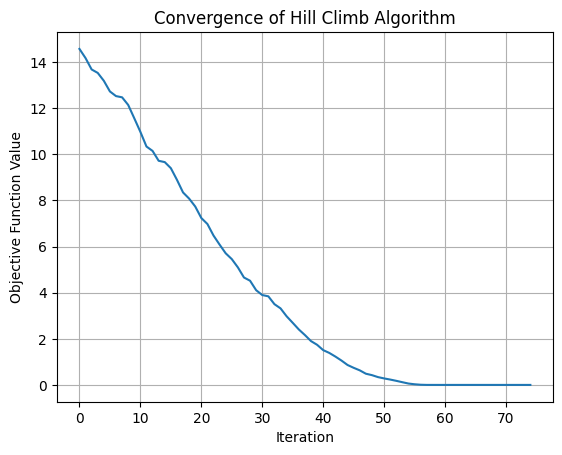

In [123]:
def f(s):
  return (s - 3) ** 2

def N(s):
    return s + np.random.uniform(-0.1, 0.1)

s_o = random.uniform(-5, 5)
S   = hc(s_o, N, 5)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Hill Climb Algorithm")
plt.grid()
plt.show()

### Ackley Function

Text(0.5, 0.92, 'Ackley Function Surface Plot')

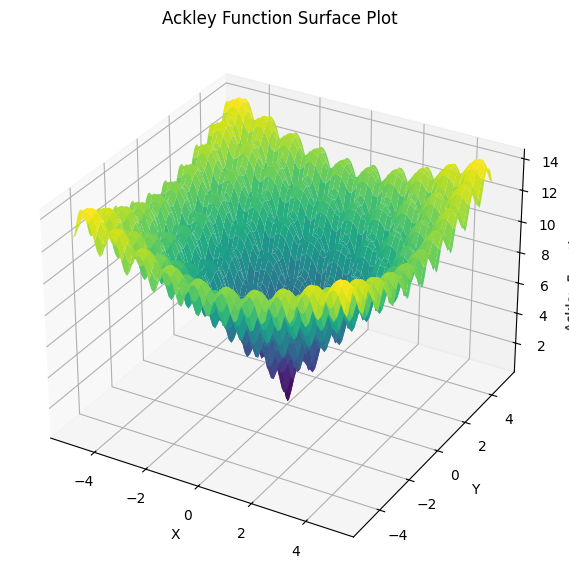

In [124]:
def f(s):
    """
    Computes the Ackley function for given solution s.

    Parameters:
    - s: Tuple of input coordinates

    Returns:
    - Function value at s
    """
    x, y = s
    return -20 * np.exp(-0.2 * np.sqrt((x**2 + y**2) / 2)) + -np.exp((np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)) / 2) + 20 + np.exp(1)

# Generate a grid of (x, y) values
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([[f(s) for s in zip(r, c)] for r, c in zip(X, Y)])

# Plot the Ackley function
fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Ackley Function Value")
ax.set_title("Ackley Function Surface Plot")


Best solution: [-4.979063263390721, 2.9861180944748047]
Objective function value: 11.217663301985608


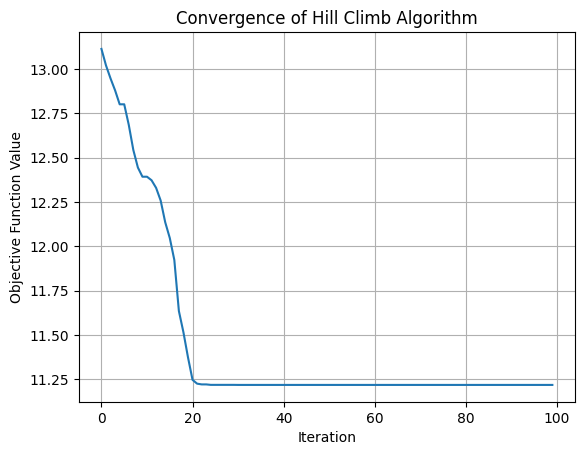

In [145]:
#### Small Step Size

def N(s):
    x, y = s
    x += np.random.uniform(-0.05, 0.05)
    y += np.random.uniform(-0.05, 0.05)
    s = [x,y]
    return s

s_o = [random.uniform(-5, 5), random.uniform(-5, 5)]
S   = hc(s_o, N, 5)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Hill Climb Algorithm")
plt.grid()
plt.show()

Best solution: [0.016720657449287968, -0.015317765433872754]
Objective function value: 0.07778440089422434


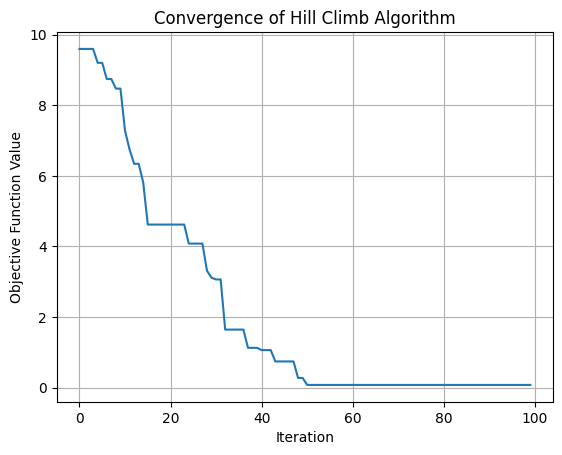

In [138]:
#### Large Step Size

def N(s):
    x, y = s
    x += np.random.uniform(-0.5, 0.5)
    y += np.random.uniform(-0.5, 0.5)
    s = [x,y]
    return s

s_o = [random.uniform(-5, 5), random.uniform(-5, 5)]
S   = hc(s_o, N, 5)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Hill Climb Algorithm")
plt.grid()
plt.show()

### Traffic Signal Optimization

Traffic congestion at signalized intersections is a critical challenge in urban transportation systems. Efficient traffic signal timing plays a crucial role in minimizing vehicle delays, reducing fuel consumption, and improving overall traffic flow. In this problem, we aim to optimize the green light durations for both the arterial road and feeder road at an intersection to minimize total vehicle delay. The total cycle time must be constrained within a predefined maximum limit to ensure a balanced and fair distribution of green times. If the green time for the arterial road is too long, vehicles on the side road experience excessive waiting times, leading to congestion. Conversely, if the feeder road is given too much green time, it can disrupt the main road's flow, causing unnecessary delays. Using a Hill Climb (HC) algorithm, we iteratively adjust the green light durations, evaluating different configurations to find an optimal balance that minimizes overall vehicle delays. This approach ensures efficient signal timing, leading to improved intersection performance and reduced traffic congestion.

1. Decision Variables

The decision variables represent the parameters that we can adjust to optimize traffic flow:

- $t_a$ (Green Time for Arterial Road): Duration (in seconds) for which the arterial road receives a green signal.

- $t_f$ (Green Time for Feeder Road): Duration (in seconds) for which the feeder road receives a green signal.

2. Objective Function

The objective function calculates the total vehicle delay at the intersection using Webster's Delay Formula, considering:

- Traffic arrival rates $\lambda_a, \lambda_f$ (vehicles per second).

- Saturation flow rates $S_a, S_f$ (maximum vehicles per second when green).

- Green times $t_a, t_f$ for arterial and feeder roads.

$\text{Total Delay} = \left( \frac{(1 - (t_a / m))^2}{2 (1 - (t_a / m) (\lambda_a / S_a))} \times \lambda_a + \frac{(1 - (t_f / m))^2}{2 (1 - (t_f / m) (\lambda_f / S_f))} \times \lambda_f \right) \times m$

where:
- $m$: Maximum cycle length (120 seconds).

- $\lambda_a, \lambda_f$: Arrival rates on the arterial and feeder roads. (0.8, 0.5)

- $S_a, S_f$: Saturation flow rates for the roads. (1.5, 1.2)

3. Constraints

- Cycle Length Constraint:
   $t_a + t_f \leq m$
   (Ensures total green time does not exceed the maximum cycle time.)

- Green Time Limits:
   $10 \leq t_a \leq 90, \quad 10 \leq t_f \leq 90$
   (Ensures fair and practical green time allocation.)

- Penalty for Invalid Solutions:
   If $t_a + t_f > m$, the function assigns a **high delay penalty** (e.g., 100000) to **discard infeasible solutions**.


Best solution: (83, 36)
Objective function value: 24.0306338028169


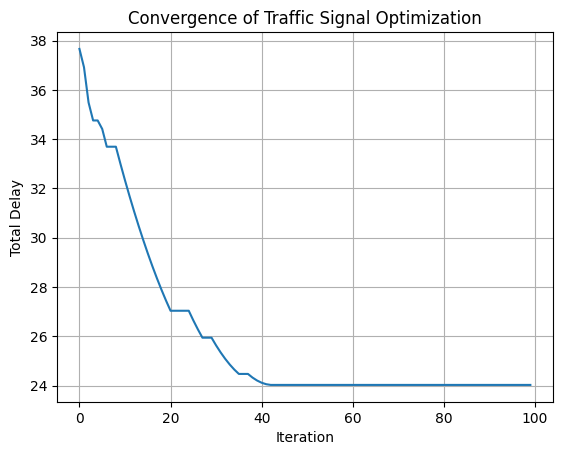

In [119]:
def f(s):
    """
    Computes total delay at an intersection.
    
    Parameters:
    - s: Tuple of green time on arterial road and feeder road (t_a, t_f)
    
    Returns:
    - Total vehicle delay (simulated value)
    """
    t_a, t_f = s
    
    m = 120  # Maximum cycle length constraint
    if t_a + t_f > m:
        return 100000   # Penalize invalid solutions
    
    # Traffic demand (vehicles per second)
    l_a = 0.8           # Arterial road vehicle arrival rate
    l_f = 0.5           # Feeder road vehicle arrival rate
    
    # Saturation flow rate (vehicles per second when green)
    S_a = 1.5
    S_f = 1.2
    
    # Compute delay using a simplified traffic delay model
    d_a = ((1 - (t_a / m)) ** 2) / (2 * (1 - (t_a / m) * (l_a / S_a)))
    d_f = ((1 - (t_f / m)) ** 2) / (2 * (1 - (t_f / m) * (l_f / S_f)))
    
    d = (d_a * l_a + d_f * l_f) * m
    return d

def N(s):
    """
    Generates a neighbor solution by slightly adjusting green times.
    """
    t_a, t_f = s
    t_d      = 2  # Small adjustment in seconds
    
    t_a = max(10, min(90, t_a + random.choice([-t_d, t_d])))
    t_f = max(10, min(90, t_f + random.choice([-t_d, t_d])))
    
    return (t_a, t_f)

# Initial solution (random green times for main and side roads)
s_o = [random.randint(10, 90), random.randint(10, 90)]
S   = hc(s_o, N, 5)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# Convergence plot
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Total Delay")
plt.title("Convergence of Traffic Signal Optimization")
plt.grid()
plt.show()